In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
import datetime
from dateutil.relativedelta import relativedelta
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train=pd.read_csv("Training_set.csv")

In [3]:
train=train.sample(train.shape[0])

In [4]:
test=pd.read_csv("Test_set.csv")

In [5]:
test.shape

(2045, 27)

In [6]:
def get_job_characteristics(df): 
    job_type=[]
    job_title=[]
    employer_title=[]
    employer_sector_title=[]
    job_sector_title=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        types=data["job_type"]
        title=data["job_title"]
        em_title=data["employer_title"]
        em_sec_title=data["employer_sector_title"]
        job_sec_title=data["job_sector_title"]
        job_type.append(types)
        job_title.append(title)
        employer_title.append(em_title)
        employer_sector_title.append(em_sec_title)
        job_sector_title.append(job_sec_title)
    d={}
    #d["job_title"]=job_title
    #d["employer_title"]=employer_title
    d["employer_sector_title"]=employer_sector_title
    d["job_sector_title"]=job_sector_title
    a=pd.DataFrame(d)
    data=pd.get_dummies(a)
    b=pd.get_dummies(job_type)
    result = pd.concat([data, b], axis=1, sort=False)
    return result

In [7]:
def get_data_for_user(user):
    jobtitles=list(user["job_title"].values)
    emtitles=list(user["employer_title"].values)
    jobsectitles=list(user["job_sector_title"].values)
    emsectitles=list(user["employer_sector_title"].values)
    a=""
    for k in range(len(jobtitles)):
        a+=jobtitles[k]+" "
        a+=emtitles[k]+" "
        a+=jobsectitles[k]+" "
        #a+=emsectitles[k]+" "
    return a

In [8]:
def get_user_characteristics(df):
    corpus=[]
    gender=[]
    ethnicity=[]
    school_type=[]
    right_to_work_uk=[]
    university_name=[]
    university_type=[]
    course_includes_industrial_placement=[]
    degree_subject_name=[]
    user_preference=[]
    job_types=list(set(df["job_type"].values))
    em_sectors=list(set(df["employer_sector_title"].values))
    job_sectors=list(set(df["job_sector_title"].values))
    count_job_types=[[] for i in range(len(job_types))]
    count_job_sectors=[[] for i in range(len(job_sectors))]
    count_em_sectors=[[] for i in range(len(em_sectors))]
    nb_em_sector=[]
    nb_job_sector=[]
    job_type=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        user=data["user_id"]
        user_data=df[df["user_id"]==user]
        user_job_type=dict(Counter(list(user_data["job_type"].values)))
        user_job_sectors=dict(Counter(list(user_data["job_sector_title"].values)))
        user_em_sectors=dict(Counter(list(user_data["employer_sector_title"].values)))
        user_em_sector=len(list(set(list(user_data["employer_sector_title"].values))))
        user_job_sector=len(list(set(list(user_data["job_sector_title"].values))))
        for i in range(len(count_job_types)):
            try:
                count_job_types[i].append(user_job_type[i])
            except:
                count_job_types[i].append(0)
        for i in range(len(count_job_sectors)):
            try:
                count_job_sectors[i].append(user_job_sectors[i])
            except:
                count_job_sectors[i].append(0)
        for i in range(len(count_em_sectors)):
            try:
                count_em_sectors[i].append(user_em_sectors[i])
            except:
                count_em_sectors[i].append(0)
        sex=data["gender"]
        jobtype=data["job_type"]
        eth=data["ethnicity"]
        school=data["school_type"]
        placement=data["course_includes_industrial_placement"]
        right=data["right_to_work_uk"]
        uni=data["university_name"]
        uni_type=data["university_type"]
        subname=data["degree_subject_name"]
        pref=data["user_preference"]
        title=data["job_title"]
        em_title=data["employer_title"]
        em_sec_title=data["employer_sector_title"]
        job_sec_title=data["job_sector_title"]
        if sex=="F":
            sex="Female"
        elif sex=="M":
            sex="Male"
        if placement==True:
            placement=1
        elif placement==False:
            placement=-1
        else:
            placement=0
        if right==True:
            right=1
        elif right==False:
            right=-1
        else:
            right=0
        if type(pref) is float:
            pref=""
        if type(subname) is float:
            subname=""
        nb_em_sector.append(user_em_sector)
        nb_job_sector.append(user_job_sector)
        gender.append(sex)
        ethnicity.append(eth)
        school_type.append(school)
        course_includes_industrial_placement.append(placement)
        right_to_work_uk.append(right)
        university_type.append(uni_type)
        #degree_subject_name.append(subname)
        #user_preference.append(pref)
        job_type.append(jobtype)
        corpus.append(pref+subname+" "+get_data_for_user(user_data))
    d={}
    for i in range(len(count_job_sectors)):
        d['count_job_sectors_'+str(i)]=count_job_sectors[i]
    for i in range(len(count_em_sectors)):
        d['count_em_sectors_'+str(i)]=count_em_sectors[i]
    for i in range(len(count_job_types)):
        d['count_job_types_'+str(i)]=count_job_types[i]
    d["gender"]=gender
    d["job_type"]=job_type
    d["nb_em_sector"]=nb_em_sector
    d["nb_job_sector"]=nb_job_sector
    d["right_to_work_uk"]=right_to_work_uk
    d["ethnicity"]=ethnicity
    #d["degree_subject_name"]=degree_subject_name
    d["school_type"]=school_type
    #d["user_preference"]=user_preference
    d["course_includes_industrial_placement"]=course_includes_industrial_placement
    a=pd.DataFrame(d)
    data=pd.get_dummies(a)
    b=pd.get_dummies(university_type)
    result = pd.concat([data, b], axis=1, sort=False)
    vectorizer = CountVectorizer(max_df=1.0, min_df=3)
    X = vectorizer.fit_transform(corpus)
    col=vectorizer.get_feature_names()
    donnees=X.toarray()
    print(X.shape)
    donnee=pd.DataFrame(donnees, columns=col)
    final=pd.concat([result, donnee], axis=1)
    return final

In [9]:
#user_characteristics=get_user_characteristics(train)

In [10]:
#user_characteristics.shape

In [11]:
#job_characteristics=get_job_characteristics(train)

In [12]:
#job_characteristics.shape

In [13]:
def get_user_info(df):
    user_info=[]
    d={}
    x=train[["user_id","job_title","employer_title","job_sector_title","job_description",
             "employer_sector_title","employer_description"]]
    n=df.shape[0]
    for i in range(n):
        if i%5000==0:
            print("progress: ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            a=d[str(user_id)]
        except:
            y=x[x["user_id"]==user_id]
            if y.shape[0]>0:
                job_titles=y["job_title"].values
                job_sector_title=y["job_sector_title"].values
                description=y["job_description"].values
                em_titles=y["employer_title"].values
                em_sector_title=y["employer_sector_title"].values
                em_description=y["employer_description"].values
                university_name=data["university_name"]
                degree_subject_name=data["degree_subject_name"]
                user_preference=data["user_preference"]
                ethnicity=data["ethnicity"]
                school_type=data["school_type"]
                if type(user_preference) is float:
                    user_preference=""
                if type(university_name) is float:
                    university_name=""
                if type(degree_subject_name) is float:
                    degree_subject_name=""
                if type(ethnicity) is float:
                    ethnicity=""
                if type(school_type) is float:
                    school_type=""
                try:
                    if np.isnan(user_preference):
                        user_preference=""
                except:
                    pass
                try:
                    if np.isnan(university_name):
                        university_name=""
                except:
                    pass
                try:
                    if np.isnan(degree_subject_name):
                        degree_subject_name=""
                except:
                    pass
                try:
                    if np.isnan(ethnicity):
                        ethnicity=""
                except:
                    pass
                try:
                    if np.isnan(school_type):
                        school_type=""
                except:
                    pass
                user_preference=user_preference+" "
                user_preference=user_preference *3
                degree_subject_name=degree_subject_name+" "
                degree_subject_name=degree_subject_name *3
                a=""
                a+=university_name+" "
                a+=degree_subject_name+" "
                a+=user_preference+" "
                a+=ethnicity+" "
                a+=school_type+" "
                for k in range(len(job_titles)):
                    a+=job_titles[k]+" "
                    a+=job_sector_title[k]+" "
                    a+=description[k]+" "
                    a+=em_titles[k]+" "
                    a+=em_sector_title[k]+" "
                    a+=em_description[k]+" "
                a=a.replace("Graduate","").replace("Programme","").replace("  "," ").replace("&","")
            else:
                university_name=data["university_name"]
                degree_subject_name=data["degree_subject_name"]
                user_preference=data["user_preference"]
                ethnicity=data["ethnicity"]
                school_type=data["school_type"]
                if type(user_preference) is float:
                    user_preference=""
                if type(university_name) is float:
                    university_name=""
                if type(degree_subject_name) is float:
                    degree_subject_name=""
                if type(ethnicity) is float:
                    ethnicity=""
                if type(school_type) is float:
                    school_type=""
                try:
                    if np.isnan(user_preference):
                        user_preference=""
                except:
                    pass
                try:
                    if np.isnan(university_name):
                        university_name=""
                except:
                    pass
                try:
                    if np.isnan(degree_subject_name):
                        degree_subject_name=""
                except:
                    pass
                try:
                    if np.isnan(ethnicity):
                        ethnicity=""
                except:
                    pass
                try:
                    if np.isnan(school_type):
                        school_type=""
                except:
                    pass
                user_preference=user_preference+" "
                user_preference=user_preference *3
                degree_subject_name=degree_subject_name+" "
                degree_subject_name=degree_subject_name *3
                a=""
                a+=university_name+" "
                a+=degree_subject_name+" "
                a+=user_preference+" "
                a+=ethnicity+" "
                a+=school_type+" "
            d[str(user_id)]=a
        user_info.append(a)
    return user_info

In [14]:
test_user_info=get_user_info(test)

progress:  0.0


In [15]:
train_user_info=get_user_info(train)

progress:  0.0
progress:  0.03995652729829945
progress:  0.0799130545965989
progress:  0.11986958189489835
progress:  0.1598261091931978
progress:  0.19978263649149725
progress:  0.2397391637897967
progress:  0.27969569108809617
progress:  0.3196522183863956
progress:  0.35960874568469503
progress:  0.3995652729829945
progress:  0.43952180028129395
progress:  0.4794783275795934
progress:  0.5194348548778929
progress:  0.5593913821761923
progress:  0.5993479094744918
progress:  0.6393044367727913
progress:  0.6792609640710906
progress:  0.7192174913693901
progress:  0.7591740186676895
progress:  0.799130545965989
progress:  0.8390870732642884
progress:  0.8790436005625879
progress:  0.9190001278608874
progress:  0.9589566551591868
progress:  0.9989131824574863


In [16]:
len(train_user_info)

125136

In [17]:
len(test_user_info)

2045

In [18]:
def clean_user(x,df):
    n=len(x)
    res=[]
    d={}
    for i,content in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            y=d[str(user_id)]
        except:
            content=content.replace(",","").replace("-"," ").replace("  "," ").replace("&eacute;","e")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
            content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
            content=content.replace("&eacute;","e").replace("&lsquo;","").replace("lsquo;","").replace("&#39;","").replace("#39;s","")
            content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
            content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ").replace("middot;","")
            content=content.replace("&rsquo;","").replace("rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
            content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
            content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=re.sub('<.*?>',"",content , flags=re.DOTALL)
            content=content.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
            try:
                content=''.join([i for i in content if not i.isdigit()])
            except:
                pass
            content=content.split(" ")
            y=[]
            for i in content:
                if len(i)>1:
                    y.append(i.lower())
            d[str(user_id)]=y
        res.append(y)
    return res

In [19]:
clean_test_user_info=clean_user(test_user_info, test)

progress :  0.0


In [20]:
clean_train_user_info=clean_user(train_user_info, train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [21]:
def get_job_info(df):
    job_info=[]
    d={}
    for i in range(df.shape[0]):
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            a=d[str(job_id)]
        except:
            title=data["job_title"]
            job_sector_title=data["job_sector_title"]
            description=data["job_description"]
            em_title=data["employer_title"]
            em_sector_title=data["employer_sector_title"]
            em_description=data["employer_description"]
            a=""
            a+=title+" "
            a+=job_sector_title+" "
            a+=description+" "
            a+=em_title+" "
            a+=em_sector_title+" "
            a+=em_description
            d[str(job_id)]=a
        job_info.append(a)
    return job_info

In [22]:
test_job_info=get_job_info(test)

In [23]:
train_job_info=get_job_info(train)

In [24]:
def clean(x,df):
    res=[]
    n=len(x)
    d={}
    for i,content in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            y=d[str(job_id)]
        except:
            content=content.replace(",","").replace("-"," ").replace("  "," ").replace("&eacute;","e")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
            content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
            content=content.replace("&eacute;","e").replace("&lsquo;","").replace("lsquo;","").replace("&#39;","").replace("#39;s","")
            content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
            content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ").replace("middot;","")
            content=content.replace("&rsquo;","").replace("rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
            content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
            content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=re.sub('<.*?>',"",content , flags=re.DOTALL)
            content=content.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
            try:
                content=''.join([i for i in content if not i.isdigit()])
            except:
                pass
            content=content.split(" ")
            y=[]
            for i in content:
                if len(i)>1:
                    y.append(i.lower())
            d[str(job_id)]=y
        res.append(y)
    return res

In [25]:
cleaned_test_job_info=clean(test_job_info,test)

progress :  0.0


In [26]:
cleaned_train_job_info=clean(train_job_info,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [27]:
def remove_stopwords_job(x, df):
    res=[]
    n=len(x)
    d={}
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,job in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            a=d[str(job_id)]
        except:
            a=[]
            for word in job:
                if word not in stop:
                    a.append(word)
            d[str(job_id)]=a
        res.append(a)
    return res

In [28]:
def remove_stopwords_user(x, df):
    res=[]
    n=len(x)
    d={}
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,user in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            a=d[str(user_id)]
        except:
            a=[]
            for word in user:
                if word not in stop:
                    a.append(word)
            d[str(user_id)]=a
        res.append(a)
    return res

In [29]:
test_clean=remove_stopwords_job(cleaned_test_job_info,test)

progress :  0.0


In [30]:
train_clean=remove_stopwords_job(cleaned_train_job_info,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [31]:
test_user_clean=remove_stopwords_user(clean_test_user_info,test)

progress :  0.0


In [32]:
train_user_clean=remove_stopwords_user(clean_train_user_info,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [33]:
def get_occurence_job(x,df):
    res=[]
    n=len(x)
    d={}
    for i,job in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            a=d[str(job_id)]
        except:
            a=dict(Counter(job))
            d[str(job_id)]=a
        res.append(a)
    return res

In [34]:
def get_occurence_user(x,df):
    res=[]
    n=len(x)
    d={}
    for i,user in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            a=d[str(user_id)]
        except:
            a=dict(Counter(user))
            d[str(user_id)]=a
        res.append(a)
    return res

In [35]:
test_occurences=get_occurence_job(test_clean,test)

progress :  0.0


In [36]:
occurences=get_occurence_job(train_clean,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [37]:
test_user_occurences=get_occurence_user(test_user_clean,test)

progress :  0.0


In [38]:
train_user_occurences=get_occurence_user(train_user_clean,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [39]:
def get_vector_job(occurences, jobs, vector_size,df):
    vector=[]
    d={}
    model = Word2Vec.load('model.bin')
    nb=len(jobs)
    for i,job in enumerate(jobs):
        if i%10000==0:
            print("progress : ",i/nb )
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            res=d[str(job_id)]
        except:
            res=np.zeros(vector_size,)
            n=sum(list(occurences[i].values()))
            job_unique=list(set(job))
            for word in job_unique:
                try:
                    a=model[word]
                except:
                    #print(word)
                    a=None
                if a is not None:
                    count=occurences[i][word]
                    w=count/n
                    res+=w*a
            d[str(job_id)]=res
        vector.append(res)
    return vector

In [40]:
def get_vector_user(occurences, users, vector_size,df):
    vector=[]
    d={}
    model = Word2Vec.load('model.bin')
    nb=len(users)
    for i,user in enumerate(users):
        if i%10000==0:
            print("progress : ",i/nb )
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            res=d[str(user_id)]
        except:
            res=np.zeros(vector_size,)
            n=sum(list(occurences[i].values()))
            user_unique=list(set(user))
            for word in user_unique:
                try:
                    a=model[word]
                except:
                    #print(word)
                    a=None
                if a is not None:
                    count=occurences[i][word]
                    w=count/n
                    res+=w*a
            d[str(user_id)]=res
        vector.append(res)
    return vector

In [41]:
test_X=get_vector_job(test_occurences, test_clean, 350,test)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [42]:
X=get_vector_job(occurences, train_clean, 350,train)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


progress :  0.0799130545965989
progress :  0.1598261091931978
progress :  0.2397391637897967
progress :  0.3196522183863956
progress :  0.3995652729829945
progress :  0.4794783275795934
progress :  0.5593913821761923
progress :  0.6393044367727913
progress :  0.7192174913693901
progress :  0.799130545965989
progress :  0.8790436005625879
progress :  0.9589566551591868


In [43]:
test_X_user=get_vector_user(test_user_occurences, test_user_clean, 350, test)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [44]:
X_user=get_vector_user(train_user_occurences, train_user_clean, 350, train)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


progress :  0.0799130545965989
progress :  0.1598261091931978
progress :  0.2397391637897967
progress :  0.3196522183863956
progress :  0.3995652729829945
progress :  0.4794783275795934
progress :  0.5593913821761923
progress :  0.6393044367727913
progress :  0.7192174913693901
progress :  0.799130545965989
progress :  0.8790436005625879
progress :  0.9589566551591868


In [45]:
test_X_train=np.array(test_X)

In [46]:
test_X_train.shape

(2045, 350)

In [47]:
X_train=np.array(X)

In [48]:
X_train.shape

(125136, 350)

In [49]:
test_X_train_user=np.array(test_X_user)

In [50]:
X_train_user=np.array(X_user)

In [51]:
X_train_user.shape

(125136, 350)

In [52]:
#X_train_job_final=np.concatenate((X_train, job_characteristics.values), axis=1)

In [53]:
#X_train_job_final.shape

In [54]:
#X_train_user_final=np.concatenate((X_train_user, user_characteristics.values), axis=1)

In [55]:
#X_train_user_final.shape

In [56]:
#pca = PCA(n_components=2)
#result_user = pca.fit_transform(X_train_user_final)

In [57]:
#print(pca.explained_variance_ratio_)

In [58]:
#pca = PCA(n_components=2)
#result = pca.fit_transform(X_train_job_final)

In [59]:
#print(pca.explained_variance_ratio_)

In [60]:
#users=list(train["user_id"].values)
#users=[str(i) for i in users]

In [61]:
def get_job_info_plot(df):
    job_info=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        title=data["job_title"]
        em_title=data["employer_title"]
        a=""
        a+=title+" "
        a+=em_title+" "
        job_info.append(a)
    return job_info

In [62]:
#infos=get_job_info_plot(train)

In [63]:
"""k=200
plt.figure(figsize=(20,20))
plt.scatter(result_user[:k, 0], result_user[:k, 1])
for i, word in enumerate(users[:k]):
    plt.annotate(word, xy=(result_user[i, 0], result_user[i, 1]))
plt.show()"""

'k=200\nplt.figure(figsize=(20,20))\nplt.scatter(result_user[:k, 0], result_user[:k, 1])\nfor i, word in enumerate(users[:k]):\n    plt.annotate(word, xy=(result_user[i, 0], result_user[i, 1]))\nplt.show()'

In [64]:
train.iloc[10][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']]

job_title                                    Graduate Analytics Consultant
employer_title                                                   Concentra
employer_sector_title                                           Consulting
job_sector_title               Technology: Consulting & Project Management
gender                                                                Male
ethnicity                                                              NaN
university_name                                    University of Liverpool
degree_subject_name                                              Economics
user_preference          Commercial Law Consumer, FMCG & Retail Educati...
Name: 75765, dtype: object

In [65]:
def get_similar_member(df, X_train, doc_id, n):
    res=[]
    beta=[]
    cos=list(cosine_similarity(X_train[doc_id,:].reshape(1, -1) , X_train))[0]
    most_similar_doc_id=np.argsort(cos)[::-1]
    a=0
    while cos[most_similar_doc_id[a]]>=0.9999999:
        a+=1
    most_similar_doc_id=most_similar_doc_id[a:]
    res.append(df.iloc[most_similar_doc_id[0]]["user_id"])
    beta.append(cos[most_similar_doc_id[0]])
    for i in range(1,len(most_similar_doc_id)):
        if cos[most_similar_doc_id[i]] not in beta:
            user=df.iloc[most_similar_doc_id[i]]["user_id"]
            if user not in res:
                res.append(user)
                beta.append(cos[most_similar_doc_id[i]])
    print(" user id : ", df.iloc[doc_id]["user_id"])
    print("most similar doc : ", res[:n])
    print("most similar values : ", beta[:n])
    print("not similar doc : ", res[-n:][::-1])
    print("not similar values : ", beta[-n:][::-1])

In [66]:
get_similar_member(train, X_train_user, 10, 5)

 user id :  87050
most similar doc :  [154093, 108679, 49239, 159411, 151035]
most similar values :  [0.9730714533728877, 0.9710813454960002, 0.9708624598126464, 0.9707238912044533, 0.9697656148414618]
not similar doc :  [158698, 180714, 173617, 193292, 142975]
not similar values :  [-0.11914561202612466, -0.10857386500394699, 0.03695085713511763, 0.1308361492375208, 0.16804726740535536]


# user

In [67]:
train[train["user_id"]==117634][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail()

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
62432,Commercial programme,BAE Systems,Technology: Consulting & Project Management,Technology: Consulting & Project Management,Female,White/White British,Royal Holloway,Sociology,NaN
62433,Graduate Scheme,Worthwhile,Entrepreneurship & Start Ups,Charity & Social Enterprise,Female,White/White British,Royal Holloway,Sociology,NaN
62435,2018 Associate Programme,On Purpose,Entrepreneurship & Start Ups,Charity & Social Enterprise,Female,White/White British,Royal Holloway,Sociology,NaN
62431,Global Research Global Graduate Programme,HSBC,Financial Services,Financial Services,Female,White/White British,Royal Holloway,Sociology,NaN
62438,Graduate Scheme,Brainlabs,Education & Teaching,Technology: IT & Software Development,Female,White/White British,Royal Holloway,Sociology,NaN


# similar users

In [68]:
train[train["user_id"]==182869][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail()

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
60911,Global Research Global Graduate Programme,HSBC,Financial Services,Financial Services,Female,NaN,NaN,NaN,Entrepreneurship & Start Ups Journalism & Publ...
60913,2018 Associate Programme,On Purpose,Entrepreneurship & Start Ups,Charity & Social Enterprise,Female,NaN,NaN,NaN,Entrepreneurship & Start Ups Journalism & Publ...
60909,Business Analyst,AT Kearney,Consulting,Consulting,Female,NaN,NaN,NaN,Entrepreneurship & Start Ups Journalism & Publ...
60910,Graduate Programs,Credit Suisse,Investment Banking,Financial Services,Female,NaN,NaN,NaN,Entrepreneurship & Start Ups Journalism & Publ...
60918,Graduate Analyst Role,CIL Management Consultants,Consulting,Consulting,Female,NaN,NaN,NaN,Entrepreneurship & Start Ups Journalism & Publ...


In [69]:
train[train["user_id"]==155182][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail()

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
91999,Assistant Consultant,Archus,Consulting,Consulting,Female,White/White British,University of Exeter,Modern Languages,NaN
92006,Graduate Scheme,Brainlabs,Education & Teaching,Technology: IT & Software Development,Female,White/White British,University of Exeter,Modern Languages,NaN
91995,International Company - Graduate,Robert Half,HR & Recruitment,Financial Services,Female,White/White British,University of Exeter,Modern Languages,NaN
92005,HR Programme,Nestlé,"Consumer, FMCG & Retail","Consumer, FMCG & Retail",Female,White/White British,University of Exeter,Modern Languages,NaN
92003,Community Banking Leadership Programme,Lloyds Banking Group,Financial Services,Financial Services,Female,White/White British,University of Exeter,Modern Languages,NaN


# not similar users

In [70]:
train[train["user_id"]==158698][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(7)

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
106992,Herbert Smith Freehills Event Dates 2017-2018,Herbert Smith Freehills,Commercial Law,Commercial Law,Male,Asian/Asian British,University of Warwick,Engineering - Mechanical,Commercial Law


In [71]:
train[train["user_id"]==186752][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(7)

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
81558,Internship - Equity Markets and Commodities - ...,Commerzbank AG,Financial Services,Financial Services,Female,NaN,NaN,NaN,NaN


In [72]:
train[train["user_id"]==98253][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(7)

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
125035,Campus Ambassadors,Reed Smith,Commercial Law,Commercial Law,Female,NaN,Durham University,History and Spanish,Commercial Law


In [73]:
def get_similar_doc(X_train, doc_id, n):
    res=[]
    beta=[]
    cos=list(cosine_similarity(X_train[doc_id,:].reshape(1, -1) , X_train))[0]
    most_similar_doc_id=np.argsort(cos)[::-1]
    a=0
    while cos[most_similar_doc_id[a]]>=0.9999999:
        a+=1
    most_similar_doc_id=most_similar_doc_id[a:]
    res.append(most_similar_doc_id[0])
    beta.append(cos[most_similar_doc_id[0]])
    for i in range(1,len(most_similar_doc_id)):
        if cos[most_similar_doc_id[i]] not in beta:
            res.append(most_similar_doc_id[i])
            beta.append(cos[most_similar_doc_id[i]])
    print("most similar doc : ", res[:n])
    print("most similar values : ", beta[:n])
    print("not similar doc : ", res[-n:][::-1])
    print("not similar values : ", beta[-n:][::-1])

In [74]:
def clean_similarity(x):
    res=[] 
    for content in x:
        content=content.replace(",","").replace("-"," ").replace("  "," ")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
        content=content.replace("&eacute;","e").replace("&lsquo;","").replace("lsquo;","").replace("&#39;","").replace("#39;s","")
        content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ").replace("middot;","")
        content=content.replace("&rsquo;","").replace("rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
        content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res.append(content)
    return res

In [75]:
data_similarity=clean_similarity(train_job_info)

In [76]:
get_similar_doc(X_train, 10, 5)

most similar doc :  [35422, 44934, 46076, 113190, 38203]
most similar values :  [0.7435465136707475, 0.696812796453856, 0.6554181140393707, 0.6540591251939086, 0.6484197857715319]
not similar doc :  [70189, 89787, 20026, 119141, 15929]
not similar values :  [-0.14239113012433496, -0.1331531257111101, -0.121488489714105, -0.09684267440942294, -0.09260447781061525]


# job

In [77]:
data_similarity[10]

'Graduate Analytics Consultant Technology Consulting & Project Management Be the driving force behind client projects Transform businesses with the latest analytical tools and techniques What involved Work on a wide variety of projects across industries and sectors One day you might be working on improving hospital efficiencies the next you could be building a supply chain analytics solution   Experience all stages of our analytics projects from developing technical solutions to designing insightful analytics dashboards and visualisations There will be plenty of client interaction and problem solving to identify and take advantage of business needs and opportunities  What youll learn Best practice across the latest analytics technologies with training and sponsorship for official certification Core consulting skills Commercial and business acumen Client facing skills What technologies youll use Microsoft SQL Server Microsoft PowerBI Tableau QlikView Alteryx PostgreSQL and Pentaho as we

# Similar jobs

In [78]:
data_similarity[69307]

'Summer Internship Programs Financial Services Summer Internship Program Our Summer Internship Program is designed to offer real insight into our business The program typically lasts ten weeks and is one of the most in depth internships within the financial services industry From day one youll be part of the team Youll face real challenges have client exposure enjoy real achievements and have your talents recognized every step of the way  Youll be responsible for projects and tasks that matter to the business Youll grow in knowledge skills and confidence Above all youll experience the team spirit that makes Credit Suisse such a special place to work Our program managers will help guide you through your summer experience and each intern is assigned a mentor and a buddy so youll have all the support you need  If you show real potential and demonstrate exceptional performance during your time with us you may be offered a full time position for the following year   Train in a comprehensive

# not similar jobs

In [79]:
data_similarity[74064]

'Summer Vacation SchemeInternships Accounting Tax & Audit What does the Summer Vacation Scheme involve  We offer a range of summer internships that reflect the kinds of jobs you could do here To find out more about these different areas click on the links   Audit & Assurance Business & Financial Advisory Governance Risk & Regulation Human Capital Real Estate Strategy & Operations Tax Consulting Technology  What kind of work would I be doing  Each of our Internships has a different focus so your work will differ depending on the kind of role you choose If its Audit & Assurance for example youll be working with a team that advises clients on their accounting systems and controls ways to improve them and reduce risk Whereas in Real Estate its all about helping clients with property buying selling planning etc  How long does the Summer Vacation Scheme last  The actual length of your internship depends on the service line you join but is usually between three and six weeks long    Audit & A

In [80]:
data = np.concatenate((X_train, X_train_user), axis=1)

In [81]:
test_data = np.concatenate((test_X_train, test_X_train_user), axis=1)

In [82]:
test_data.shape

(2045, 700)

In [83]:
data.shape

(125136, 700)

# Autoencoder

In [84]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [85]:
from keras.models import load_model

# Create model

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, data, test_size=0.1)

In [90]:
x_test.shape

(12514, 700)

In [93]:
input_data = Input(shape=(data.shape[1],))
encoded = Dense(600, activation='relu')(input_data)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(500, activation='relu')(encoded)
#encoded = Dropout(0.4)(encoded)
encoded = Dense(400, activation='relu')(encoded)
#encoded = Dropout(0.1)(encoded)
encoded = Dense(300, activation='relu')(encoded)
#encoded = Dropout(0.4)(encoded)
encoded = Dense(200, activation='relu')(encoded)
#encoded = Dropout(0.1)(encoded)
encoded = Dense(100, activation='relu')(encoded)
#encoded = Dropout(0.4)(encoded)
encoded = Dense(50, activation='relu')(encoded)

decoded = Dense(100, activation='relu')(encoded)
#decoded = Dropout(0.4)(decoded)
decoded = Dense(200, activation='relu')(decoded)
#decoded = Dropout(0.1)(decoded)
decoded = Dense(300, activation='relu')(decoded)
#decoded = Dropout(0.4)(decoded)
decoded = Dense(400, activation='relu')(decoded)
#decoded = Dropout(0.4)(decoded)
decoded = Dense(500, activation='relu')(decoded)
#decoded = Dropout(0.2)(decoded)
decoded = Dense(600, activation='relu')(decoded)
#decoded = Dropout(0.4)(decoded)
#decoded = Dense(800, activation='relu')(decoded)
decoded = Dense(data.shape[1], activation='linear')(decoded)

In [94]:
autoencoder = Model(input_data, decoded)
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoencoder.compile(loss='mean_squared_error', optimizer=adam)

history=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=5000,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 112622 samples, validate on 12514 samples
Epoch 1/100
112622/112622 [==============================] - 216s 2ms/step - loss: 0.0816 - val_loss: 0.0149
Epoch 2/100
112622/112622 [==============================] - 80s 713us/step - loss: 0.0144 - val_loss: 0.0143
Epoch 3/100
112622/112622 [==============================] - 80s 711us/step - loss: 0.0141 - val_loss: 0.0141
Epoch 4/100
112622/112622 [==============================] - 78s 695us/step - loss: 0.0136 - val_loss: 0.0134
Epoch 5/100
112622/112622 [==============================] - 78s 694us/step - loss: 0.0131 - val_loss: 0.0130
Epoch 6/100
112622/112622 [==============================] - 78s 691us/step - loss: 0.0126 - val_loss: 0.0124
Epoch 7/100
112622/112622 [==============================] - 78s 697us/step - loss: 0.0122 - val_loss: 0.0121
Epoch 8/100
112622/112622 [==============================] - 62s 547us/step - loss: 0.0120 - val_loss: 0.0119
Epoch 9/100
112622/112622 [==============================] - 37s 327us

112622/112622 [==============================] - 36s 323us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 75/100
112622/112622 [==============================] - 36s 322us/step - loss: 0.0043 - val_loss: 0.0044
Epoch 76/100
112622/112622 [==============================] - 37s 326us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 77/100
112622/112622 [==============================] - 37s 324us/step - loss: 0.0055 - val_loss: 0.0055
Epoch 78/100
112622/112622 [==============================] - 36s 322us/step - loss: 0.0048 - val_loss: 0.0045
Epoch 79/100
112622/112622 [==============================] - 38s 336us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 80/100
112622/112622 [==============================] - 38s 335us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 81/100
112622/112622 [==============================] - 39s 342us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 82/100
112622/112622 [==============================] - 37s 325us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 83/100
1

# Loss

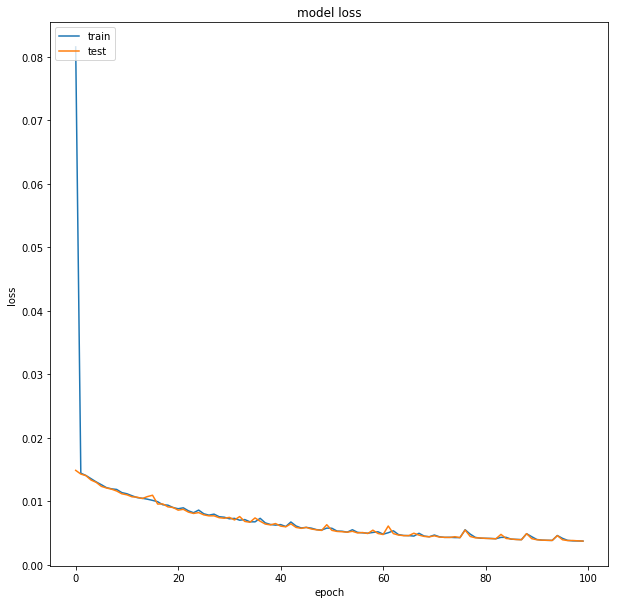

In [95]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
autoencoder.save('model.h5')

In [105]:
new_predictions[0,:50]

array([-0.03540946, -0.13441858,  0.08056124,  0.221413  ,  0.04294347,
       -0.11343296,  0.09547411,  0.5490711 ,  0.09030824, -0.14575076,
        0.09732994,  0.25514287, -0.07246329, -0.304709  , -0.02670881,
        0.02543148, -0.52797604,  0.13422094, -0.18471085,  0.2620564 ,
        0.28889632,  0.18621181,  0.07269341, -0.03742869, -0.41475394,
       -0.26988146,  0.30755162, -0.05940884,  0.11596066, -0.41828525,
       -0.06874769, -0.40843824,  0.5901353 , -0.16069542, -0.12840036,
       -0.05864508,  0.0919178 ,  0.09166344,  0.05268285,  0.03566686,
        0.00840456, -0.09534641,  0.15067512, -0.11718532, -0.04379994,
        0.09595412,  0.32305303, -0.02799875,  0.15663776,  0.05690826],
      dtype=float32)

In [106]:
predictions=autoencoder.predict(x_test)

In [107]:
x_test[0,:50]

array([-0.02102856, -0.13744961,  0.06806465,  0.20344211,  0.04803307,
       -0.12442788,  0.09628485,  0.51898635,  0.09287311, -0.14808669,
        0.10933098,  0.27176079, -0.08411171, -0.31209839, -0.03819622,
        0.04017922, -0.54759633,  0.14166643, -0.18378697,  0.26381813,
        0.29700438,  0.18665482,  0.05854281, -0.03329473, -0.42165206,
       -0.2665128 ,  0.30136341, -0.06027701,  0.10689598, -0.39721733,
       -0.07260506, -0.3946092 ,  0.59495724, -0.16362847, -0.1210157 ,
       -0.0570148 ,  0.11056362,  0.06788637,  0.05184581,  0.03291846,
       -0.00090651, -0.10980141,  0.14912577, -0.1111011 , -0.0446132 ,
        0.08853083,  0.32535498, -0.04012543,  0.1758333 ,  0.05684665])

In [108]:
predictions[0,:50]

array([-0.03540946, -0.13441858,  0.08056124,  0.221413  ,  0.04294347,
       -0.11343296,  0.09547411,  0.5490711 ,  0.09030824, -0.14575076,
        0.09732994,  0.25514287, -0.07246329, -0.304709  , -0.02670881,
        0.02543148, -0.52797604,  0.13422094, -0.18471085,  0.2620564 ,
        0.28889632,  0.18621181,  0.07269341, -0.03742869, -0.41475394,
       -0.26988146,  0.30755162, -0.05940884,  0.11596066, -0.41828525,
       -0.06874769, -0.40843824,  0.5901353 , -0.16069542, -0.12840036,
       -0.05864508,  0.0919178 ,  0.09166344,  0.05268285,  0.03566686,
        0.00840456, -0.09534641,  0.15067512, -0.11718532, -0.04379994,
        0.09595412,  0.32305303, -0.02799875,  0.15663776,  0.05690826],
      dtype=float32)

In [109]:
test_predictions=autoencoder.predict(test_data)

In [110]:
test_mse = np.mean(np.power(test_data - test_predictions, 2), axis=1)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)[:test_data.shape[0]]
error_df = pd.DataFrame({'reconstruction_error': mse, 'test_reconstruction_error': test_mse})
error_df.describe()

,reconstruction_error,test_reconstruction_error
count,294.000000,294.000000
mean,0.003812,0.086868
std,0.003308,0.007160
min,0.000335,0.053470
25%,0.001815,0.082569
50%,0.002889,0.086269
75%,0.004796,0.090362
max,0.030089,0.121486


In [111]:
def get_test_user_id(df):
    users=list(set(list(df["user_id"].values)))
    d={}
    for user in users:
        d[str(user)]=[]
    n=df.shape[0]
    for i in range(n):
        user_id=df.iloc[i]["user_id"]
        d[str(user_id)].append(i)
    return d

In [112]:
select_ids=get_test_user_id(test)

In [114]:
def get_best_worse_jobs(x,n):
    a=np.argsort(x)[:n]
    b=np.argsort(x)[::-1][:n]
    print("best  jobs : ",a)
    print("best  jobs errors : ",x[a])
    print("worst  jobs : ",b)
    print("worst  jobs errors : ",x[b])

In [115]:
get_best_worse_jobs(test_mse,5)

best  jobs :  [252 145 150 118  71]
best  jobs errors :  [0.05347014 0.07268894 0.07277304 0.0735609  0.07397324]
worst  jobs :  [ 17 181  46  30 227]
worst  jobs errors :  [0.12148622 0.11693042 0.11544135 0.10651174 0.10544073]


In [116]:
test.iloc[252][['job_description','job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array(['<h2>Who can apply</h2>\r\r\n\r\r\n<p>This program is suited for students from any academic discipline who are looking to secure a 3-6 month internship as a part of their degree. If you are applying to one of our European offices, you will need to be able to speak the local language.</p>\r\r\n\r\r\n<h2>Application deadline</h2>\r\r\n\r\r\n<p>Applications are accepted year round and reviewed on an ongoing/rolling basis.</p>\r\r\n\r\r\n<h2>About the programme</h2>\r\r\n\r\r\n<p>Off-Cycle Internships typically last between 3-6 months and are available across many of our European offices including: London, Frankfurt, Paris, Zurich, Milan, Geneva, Dubai, Moscow, Madrid, Tel Aviv and Doha. Opportunities are available in the following divisions:&nbsp;</p>\r\r\n\r\r\n<ul>\r\r\n\t<li>Finance</li>\r\r\n\t<li>Global Investment Research</li>\r\r\n\t<li>Investment Banking</li>\r\r\n\t<li>Investment Management</li>\r\r\n\t<li>Securities</li>\r\r\n</ul>\r\r\n\r\r\n<h2>How to apply</h2>\r\r\n\r

In [117]:
test.iloc[145][['job_description','job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array(['<h2>Job Description</h2>\r\r\n\r\r\n<p>Quantitative Researchers play a key role on the Quantitative Research (&ldquo;QR&rdquo;) team, which is responsible for developing and testing automated quant trading strategies using sophisticated statistical techniques.</p>\r\r\n\r\r\n<h2>Your Objectives</h2>\r\r\n\r\r\n<ul>\r\r\n\t<li>Conceptualize valuation strategies, develop and continuously improve upon mathematical models, and help translate algorithms into code</li>\r\r\n\t<li>Back test and implement trading models and signals in a live trading environment</li>\r\r\n\t<li>Use unconventional data sources to drive innovation</li>\r\r\n\t<li>Conduct research and statistical analysis to build and refine monetization systems for trading signals</li>\r\r\n</ul>\r\r\n\r\r\n<h2>Your Skills &amp; Talents</h2>\r\r\n\r\r\n<ul>\r\r\n\t<li>Advanced training in Mathematics, Statistics, Physics, Computer Science, or another highly quantitative field (Bachelor&rsquo;s, Master&rsquo;s, PhD degree)

# Worst

In [118]:
test.iloc[181][['job_description','job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array(['<h2>Overview</h2>\r\r\n\r\r\n<p>BPP is the professional&nbsp;university for&nbsp;career-focussed&nbsp;students. BPP&nbsp;offers a wide range of modern, relevant postgraduate programmes and professional qualifications to help you realise your ambitions and tailor your learning to your specific interests. We also offer a full careers service in helping you realise your ambitions.</p>\r\r\n\r\r\n<p>At BPP University, we&nbsp;think, act, and teach in&nbsp;a way that is innovative,&nbsp;knowledgeable and&nbsp;professionally focussed.</p>\r\r\n\r\r\n<h2>What makes&nbsp;BPP University&nbsp;different?</h2>\r\r\n\r\r\n<p>We are the experts that the experts turn to.&nbsp;We actively shape the next generation of&nbsp;professionals through our academically&nbsp;rigorous programmes. Much of our&nbsp;programme content is designed in&nbsp;collaboration with businesses and&nbsp;employers, and you will be taught in&nbsp;professional workspaces by tutors with&nbsp;practitioner experience.</p>\r\

In [126]:
test.iloc[17][['job_description','job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array(['<p>Our Online MSc in Law, Governance, Risk and Compliance is a professional programme, delivered in collaboration with the International Compliance Association (ICA) for those seeking career-enhancing postgraduate qualifications.&nbsp;</p>\r\r\n\r\r\n<p>This programme is specifically designed for students from around the world who already hold the ICA Professional Postgraduate Diploma in Governance, Risk and Compliance and wish to build on their international legal and GRC knowledge.</p>\r\r\n\r\r\n<p>The MSc will focus on the mix of professional skills required to apply regulations in practice &ndash; analysis, drafting and presentation skills, among others &ndash; so that you are equipped with the knowledge you will need as you build your international career.</p>\r\r\n\r\r\n<p>We know what it takes to succeed on the constantly changing global, legal and financial services stage. Everything we do is geared towards teaching in a professional, practical context so you can enhan

# load model

In [87]:
new_autoencoder = load_model("final_model.h5")

In [113]:
adam=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
new_autoencoder.compile(loss='mean_squared_error', optimizer=adam)

new_autoencoder.fit(data, data,
                epochs=50,
                batch_size=7000,
                shuffle=True)

Epoch 1/50
125136/125136 [==============================] - 139s 1ms/step - loss: 0.0098
Epoch 2/50
125136/125136 [==============================] - 40s 321us/step - loss: 0.0069
Epoch 3/50
125136/125136 [==============================] - 39s 309us/step - loss: 0.0058
Epoch 4/50
125136/125136 [==============================] - 38s 305us/step - loss: 0.0053
Epoch 5/50
125136/125136 [==============================] - 39s 310us/step - loss: 0.0051
Epoch 6/50
125136/125136 [==============================] - 38s 305us/step - loss: 0.0048
Epoch 7/50
125136/125136 [==============================] - 38s 303us/step - loss: 0.0046
Epoch 8/50
125136/125136 [==============================] - 39s 315us/step - loss: 0.0045
Epoch 9/50
125136/125136 [==============================] - 40s 316us/step - loss: 0.0042
Epoch 10/50
125136/125136 [==============================] - 39s 311us/step - loss: 0.0047
Epoch 11/50
125136/125136 [==============================] - 39s 310us/step - loss: 0.0042
Epoch 12/

In [114]:
new_autoencoder.save('final_model.h5')

In [115]:
train_predictions=new_autoencoder.predict(data)

In [116]:
test_predictions=new_autoencoder.predict(test_data)

In [93]:
def get_test_user_id(df):
    users=list(set(list(df["user_id"].values)))
    d={}
    for user in users:
        d[str(user)]=[]
    n=df.shape[0]
    for i in range(n):
        user_id=df.iloc[i]["user_id"]
        d[str(user_id)].append(i)
    return d

In [145]:
select_ids=get_test_user_id(test)
selected_user=select_ids["155182"]
#selected_mse=test_mse[selected_user]

In [146]:
test_mse_1 = np.power(test_data[selected_user] - test_predictions[selected_user], 2)
mse_1 = np.power(data - train_predictions, 2)

In [147]:
df_train=pd.DataFrame(mse_1, columns=["col"+str(i) for i in range(mse_1.shape[1])])
df_test=pd.DataFrame(test_mse_1, columns=["col"+str(i) for i in range(mse_1.shape[1])])

In [148]:
df_test.head(2)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col690,col691,col692,col693,col694,col695,col696,col697,col698,col699
0,0.004663,0.006413,0.012687,0.002379,0.000390,0.002064,0.005560,0.001733,0.00002,0.000257,...,0.001264,0.000087,0.005926,0.000038,0.007369,0.000007,0.003764,0.024220,0.000482,0.002523
1,0.008103,0.133410,0.014222,0.007694,0.005597,0.018696,0.003044,0.002291,0.00241,0.003219,...,0.000030,0.000151,0.001614,0.000008,0.007184,0.000319,0.002246,0.027438,0.000015,0.002374


In [150]:
df_train.head(2)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col690,col691,col692,col693,col694,col695,col696,col697,col698,col699
0,0.000456,0.000185,0.000249,0.000035,0.000543,0.000034,8.186448e-08,0.000096,0.000314,0.000060,...,0.006918,0.000096,0.000248,0.000296,0.000156,0.000006,0.000646,0.00174,0.000186,0.000016
1,0.000018,0.000009,0.000107,0.000016,0.000011,0.000411,3.540577e-04,0.000007,0.000010,0.000051,...,0.001221,0.006967,0.010797,0.002359,0.001124,0.001068,0.004601,0.00384,0.001851,0.001893


In [254]:
test_reconstruction_error=df_test.sum(axis=1).values

In [256]:
reconstruction_error[:10]

0    3.479218
1    5.733729
2    5.125675
3    3.762453
4    3.674176
5    6.715399
6    1.858253
7    3.527649
8    4.109744
9    4.310875
dtype: float64

In [261]:
train_reconstruction_error=df_train.sum(axis=1)

In [263]:
train_reconstruction_error[:10]

0     0.400191
1     1.378169
2     2.085674
3     0.865040
4     1.133220
5     2.484558
6     1.602567
7     1.246450
8    16.173773
9     0.824381
dtype: float64

In [279]:
def get_max(df,treshold):
    x=df.describe(percentiles=[treshold])[5]
    return x

In [293]:
train_max=get_max(train_reconstruction_error,0.8)

In [294]:
train_max

2.7204860211005975

In [296]:
rank_jobs=np.argsort(test_reconstruction_error)

In [314]:
rank_jobs

array([ 38, 191, 165,  54, 187, 209, 278, 192, 202,  53,  28, 279,  51,
       126, 127,  73, 123, 223,  50,  63,  76, 185, 251,  43, 196,  91,
         6,  48, 104,  89,  60, 199,  15,  86, 271, 157, 261,  39,  92,
       190,  72, 203, 108, 284, 229, 166,  17, 111, 109, 118, 277, 275,
       285,  81, 189, 133,  36,  32, 195, 140, 253, 153, 252, 276, 282,
       103, 155, 272,  35, 269, 179, 201,  66, 119, 129, 113, 283, 258,
       231, 168,  95, 289,  24,  88, 193,  55, 143, 204, 122, 225,  25,
        58, 128, 243, 130, 236, 233, 132, 237, 162, 235,  69,  68, 110,
       234, 167, 194, 263,  65, 178, 250,  59, 164,   0,  57, 115,  80,
        18,  21,   7,  61,  52, 183, 244, 207, 240, 163,   4,  16, 210,
       205,  70,   3, 265,  56, 206,  19, 144, 175, 173, 242, 117,  93,
       213, 212,  40,  44,  30, 220,  47,  96, 188, 211, 274, 254, 259,
         8, 241, 136,  87,  94,  31, 257, 268,   9,  20, 248, 246,  41,
       186,  75, 198, 134, 239,  33, 177, 176,  82, 270,  71, 14

In [298]:
def make_recommendations(x,treshold):
    res=[]
    for i in x:
        if i<=treshold:
            res.append(1)
        else:
            res.append(0)
    return np.array(res)

In [299]:
recommendations=make_recommendations(test_reconstruction_error, train_max)

In [300]:
sum(recommendations)

69

In [302]:
recommended_jobs=rank_jobs[:sum(recommendations)]

In [306]:
train[train["user_id"]==155182][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(200)

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
91994,Leadership Development Programme,Teach First,Education & Teaching,Charity & Social Enterprise,Female,White/White British,University of Exeter,Modern Languages,NaN
91997,Graduate Scheme,Worthwhile,Entrepreneurship & Start Ups,Charity & Social Enterprise,Female,White/White British,University of Exeter,Modern Languages,NaN
91996,Global Research Global Graduate Programme,HSBC,Financial Services,Financial Services,Female,White/White British,University of Exeter,Modern Languages,NaN
91993,Graduate Teacher Training Programme,Ark Teacher Training,Education & Teaching,Charity & Social Enterprise,Female,White/White British,University of Exeter,Modern Languages,NaN
91998,Business Associate,Next Jump,Technology: Consulting & Project Management,"Media, Film & TV",Female,White/White British,University of Exeter,Modern Languages,NaN
92001,General Graduate Development Programme,Wellcome Trust,Charity & Social Enterprise,Charity & Social Enterprise,Female,White/White British,University of Exeter,Modern Languages,NaN
92002,Bright Network Springboard Programme,Bright Network Springboard,Sales & Commercial,Sales & Commercial,Female,White/White British,University of Exeter,Modern Languages,NaN
92004,Project Management Graduate,Fujitsu,Technology: Consulting & Project Management,Technology: Consulting & Project Management,Female,White/White British,University of Exeter,Modern Languages,NaN
92000,2018 Associate Programme,On Purpose,Entrepreneurship & Start Ups,Charity & Social Enterprise,Female,White/White British,University of Exeter,Modern Languages,NaN
91999,Assistant Consultant,Archus,Consulting,Consulting,Female,White/White British,University of Exeter,Modern Languages,NaN


In [303]:
recommended_jobs

array([ 38, 191, 165,  54, 187, 209, 278, 192, 202,  53,  28, 279,  51,
       126, 127,  73, 123, 223,  50,  63,  76, 185, 251,  43, 196,  91,
         6,  48, 104,  89,  60, 199,  15,  86, 271, 157, 261,  39,  92,
       190,  72, 203, 108, 284, 229, 166,  17, 111, 109, 118, 277, 275,
       285,  81, 189, 133,  36,  32, 195, 140, 253, 153, 252, 276, 282,
       103, 155, 272,  35], dtype=int64)

In [311]:
rank_jobs[-10:]

array([288, 247, 230, 216, 174, 217,  27, 137, 281, 218], dtype=int64)

In [305]:
test.iloc[selected_user[0]+38][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([155182, 'UK Sales Graduate Job 2019',
       '<h2 style="margin-left: 0px !important;">Overview</h2>\r\r\n\r\r\n<p style="margin-left:0px !important">Want to work with brands that millions of consumers can&rsquo;t live without? Want to work with like-minded and talented colleagues? Are you motivated by challenging problems, real responsibility and winning?</p>\r\r\n\r\r\n<p style="margin-left:0px !important"><strong>If</strong>&nbsp;<strong>so,</strong>&nbsp;<strong>we</strong>&nbsp;<strong>have</strong>&nbsp;<strong>the</strong>&nbsp;<strong>perfect</strong>&nbsp;<strong>opportunity</strong>&nbsp;<strong>for</strong>&nbsp;<strong>you.</strong>&nbsp;<strong>Apply</strong>&nbsp;<strong>now</strong>&nbsp;<strong>to</strong>&nbsp;<strong>join</strong>&nbsp;<strong>the</strong>&nbsp;<strong>P&amp;G Sales</strong>&nbsp;<strong>team.</strong></p>\r\r\n\r\r\n<h2 style="margin-left: 0px !important;">What you can expect</h2>\r\r\n\r\r\n<p style="margin-left:0px !important">Working in sal

In [307]:
test.iloc[selected_user[0]+191][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([155182, 'P&G UK Sales Summer Internship',
       '<div>\r\r\n<div>\r\r\n<div>\r\r\n<p>Want to work with brands that millions of consumers can&rsquo;t live without? Are you ready to gain real work experience with the largest Consumer Goods Company in the world while still at university, and set the path for your future career?</p>\r\r\n\r\r\n<p>Then&nbsp;we&nbsp;have&nbsp;the&nbsp;perfect&nbsp;opportunity&nbsp;for&nbsp;you. Come and do one of our summer sales internships.</p>\r\r\n\r\r\n<h2>What does a job in sales look like?</h2>\r\r\n\r\r\n<p>Working in sales at P&amp;G means getting your own multi million pound business &amp; budget to lead from day one. That means working with great brands like Pampers, Fairy &amp; Gillette and the UK&#39;s biggest grocery retailers. You are the key contact for the business with your retailer and are responsible for building and maintaining that relationship. You build and design ideas and strategies using analytics and shopper insights and t

In [309]:
test.iloc[selected_user[0]+53][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([155182, 'Teach First LDP Black Heritage',
       '<p>Some job description</p>', 'Teach First',
       'Education & Teaching', 'Charity & Social Enterprise', 'Female',
       'White/White British', 'University of Exeter', 'Modern Languages',
       nan], dtype=object)

In [310]:
test.iloc[selected_user[0]+104][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([155182, 'Graduate Programmes',
       '<h2>FDM Group</h2>\r\r\n\r\r\n<p>FDM Group is a professional services provider with a focus on IT and the UK&rsquo;s leading IT graduate employer. FDM&rsquo;s business model is both unique and robust, bringing people and technology together.</p>\r\r\n\r\r\n<p>We are renowned for our dynamic Careers Programme, which gives graduates and ex-Forces personnel award-winning business and technical training in core disciplines. They then progress to represent FDM on client sites as our Consultants for a minimum of two years. With over 180 clients worldwide, we help them achieve specific business objectives within various sectors, including financial services, media, retail and insurance.</p>\r\r\n\r\r\n<h2>The programme</h2>\r\r\n\r\r\n<p>The FDM Graduate Programme is a fantastic opportunity to kick-start your career in IT. As a successful candidate, your award-winning training will take place in one of our state of the art Academies around the UK 

# Not recommended jobs

In [312]:
test.iloc[selected_user[0]+288][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([155182, 'MBA Programme',
       '<p>Our MBA students have access to the best research and industry knowledge from a world-renowned business school right in the heart of London.</p>\r\r\n\r\r\n<p>The Cass MBA programme is delivered in both a full-time and Executive part-time format, with programmes delivered in London and Dubai.</p>\r\r\n\r\r\n<h3><a href="https://www.cass.city.ac.uk/study/mba/full-time">Full-Time MBA Course in London</a></h3>\r\r\n\r\r\n<p>The Cass Full-time MBA course is a challenging 12-month journey combining intensive learning and practical application that will sharpen your performance and give you the clarity to design the next decisive phase of your career.</p>\r\r\n\r\r\n<h3><a href="https://www.cass.city.ac.uk/study/mba/executive-mba">Executive MBA Course in London</a></h3>\r\r\n\r\r\n<p>The Cass Executive MBA is a challenging 24-month journey combining intensive learning and practical application that will sharpen your performance and give you the clar

In [313]:
test.iloc[selected_user[0]+27][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([155182, 'Graduate Programme - Process Engineering',
       '<h2>Overview/Responsibilities</h2>\r\r\n\r\r\n<p>Amec Foster Wheeler recruits within three main disciplines: Business, Science and Environment and Engineering. Each of these disciplines provides opportunities within our Environment &amp; Infrastructure (E&amp;I), Transmission &amp; Distribution (T&amp;D), Clean Energy and Oil &amp; Gas (O&amp;G) business areas and there are a wide range of technical and non-technical opportunities available.&nbsp;</p>\r\r\n\r\r\n<h2>Skills/Qualifications</h2>\r\r\n\r\r\n<p>We offer a variety of accredited programmes, each recognised by the appropriate professional institution or qualifying body. As a graduate you will be enrolled on the appropriate programme depending on your chosen discipline and market area. Each programme is focused on providing the environment for you to gain the skills and competencies needed for your professional registration or to support you in gaining a recogni

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predictions, x_test))
print(mean_absolute_error(predictions, x_test))

0.003920869654342296
0.043668805322460515
